# Estadística para Ciencia de los Datos

---



# Tarea #3
--- 

**Entregables:** Un archivo jupyter ( .IPYNB ). 

**Modo de trabajo:** Parejas

**Estudiantes:**

Yu Hung Yeh Chai

José Alberto Raygada Agüero

---
Esta tarea se puede realizar en parejas si así lo desean. La presente asignación busca que los estudiantes apliquen intervalos de confianza como un medio para explorar los conjuntos de datos de la Tarea \#2.  En esa tarea se pidió analizar un grupo de columnas en busca de las distribuciones que modelaban más adecuadamente cada una.

Se pide a los estudiantes que seleccionen 2 columnas de variables cuantitativas del conjunto de datos y exploren intervalos de confianza y el contexto alrededor de ellos. 

Para toda esta tarea vamos a suponer que el set de datos de diamantes es nuestra población de interés. Partiendo de este supuesto, para ambas columnas obtenga el promedio poblacional y la desviación estándar poblacional.



In [1]:
import pandas as pd
import statistics as st
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

#Funciones
def bold(t):
    """
    Funcion para formatear en negrita el texto.
    t = cualquier dato
    """
    return "\033[1m" + str(t) + "\033[0m"

def newline():
    """
    Funcion para imprimir cambio de linea
    """
    print("\r\n")
    
def titulo(t):
    """
    Funcion para imprimir titulo formateado.
    t = titulo
    """
    print(bold(t))
    print("----------------------------------------------")
    newline()

def imprimirVariable(nombre, valor):
    """
    Funcion para imprimir titulo formateado.
    nombre = nombre de la variable
    valor = el varlor de la variable
    """
    print(bold(nombre), ": ", valor)

def analisisIntervalosConfianza(datos, cantidadMuestra, alfa):
    """
    Funcion que analiza intervalo de confianza de una muestra tomada de los datos y establece si incluye el promedio poblacional.
    Entradas:
    datos = datos origen para tomar la muestra
    cantidadMuestra = tamaño de la muestra (n)
    alfa = nivel de confianza (1 - alfa)
    """
    
    desviacionEstandarPoblacion = st.pstdev(datos)
    mediaPoblacion = st.mean(datos)
    
    muestra = datos.sample(cantidadMuestra, random_state=None)
    mediaMuestra = st.mean(muestra)
    
    z = stats.norm.ppf(alfa / 2)
    e = z * desviacionEstandarPoblacion / np.sqrt(cantidadMuestra)
    e1 = mediaMuestra + e
    e2 = mediaMuestra - e
    
    imprimirVariable("Tamaño de la muestra", cantidadMuestra)
    imprimirVariable("Nivel de confianza", 1 - alfa)
    imprimirVariable("Margen de error", np.abs(e))
    imprimirVariable("Media de la Población", mediaPoblacion)
    imprimirVariable("Intervalo de confianza", f"[{e1}, {e2}]")
    
    if e1 < mediaPoblacion < e2:
        print(bold('Sí incluye promedio poblacional.'))
    else:
        print(bold('No incluye promedio poblacional.'))

def obtenerCantidadMuestra(desviacionEstandarPoblacion, margenError, alfa):
    """
    Funcion que devuelve el tamaño de muestra a partir de los otros datos para la formula de margen de error de una muestra.
    Entradas:
    desviacionEstandarPoblacion = desviacion estándar de la población
    margenError = margen de error de la fórmula
    alfa = nivel de confianza (1 - alfa)
    """
    z = stats.norm.ppf(alfa / 2)
    return np.round((desviacionEstandarPoblacion * z / margenError) ** 2, 0)

def crearMediaMuestras(datos, cantidadMuestra, n):
    """
    Funcion que devuelve una lista con la media de cada muestra de n observaciones a partir de datos dados.
    Entradas:
    datos = datos origen para tomar la muestra
    cantidadMuestra = tamaño de la muestra
    n = cantidad de observaciones de cada muestra
    """
    
    muestras = []
    for x in range (cantidadMuestra):
        muestra = datos.sample(n, random_state=None)
        media = np.mean(muestra)
        muestras.append(media)
    return muestras

def graficarMedias(mediasMuestral, mediaPoblacional):
    """
    Funcion que grafica la media de varias muestras comparando con la media poblacion usando barras de error.
    Entradas:
    mediasMuestral = lista de medias de las muestras
    mediaPoblacional = media de la población de datos
    """
    labelX = list(range(1, len(mediasMuestral) + 1))
    error = np.std(mediasMuestral)
    
    plt.errorbar(labelX, mediasMuestral, yerr = error, fmt = "o")
    plt.axhline(y = mediaPoblacional, color="orange", ls = "--", linewidth = 2, label = "Media poblacional")
    
    plt.legend()
    plt.ylabel("Media Muestral")
    plt.xlabel("Muestras")
    
    plt.show()
    
def histogramaMedias(mediasMuestral):
    """
    Funcion que grafica histograma de la media de varias muestras.
    Entradas:
    mediasMuestral = lista de medias de las muestras
    """
    count, bins, ignored = plt.hist(mediasMuestral, edgecolor = "black", linewidth = 1)
    plt.ylabel("Frecuencia")
    plt.xlabel("Media Muestral")
    plt.show()

In [2]:
df = pd.read_csv(r'datasetTarea2.csv')
df = pd.DataFrame(data=df)
depth = df['depth']
price = df['price']
df

,carat,cut,color,clarity,depth,table,price,x,y,z,unknownCol
0,0.32,Premium,J,VS2,61.9,58.0,504,4.38,4.35,2.70,5.100000
1,1.50,Good,F,SI2,62.9,59.0,7727,7.19,7.32,4.56,4.900000
2,0.38,Ideal,H,VS1,61.7,55.0,955,4.65,4.70,2.89,4.700000
3,0.53,Ideal,F,VVS1,62.1,53.2,2273,5.17,5.21,3.22,4.600000
4,0.55,Ideal,D,VS2,60.6,56.0,2224,5.30,5.36,3.23,5.000000
...,...,...,...,...,...,...,...,...,...,...,...
195,1.12,Premium,G,SI1,60.1,58.0,5233,6.78,6.83,4.09,6.763648
196,0.37,Ideal,D,VVS2,61.6,54.0,997,4.61,4.64,2.85,6.381457
197,0.30,Very Good,D,VVS2,60.6,58.0,2366,4.33,4.35,2.63,5.112152
198,2.18,Premium,J,VS2,60.1,58.0,15465,8.46,8.41,5.07,6.108909


## Parte 1

Con estas medias poblacionales los estudiantes deberán, para ambas columnas:
a) Seleccionar una muestra aleatoria con un $n$ = 25.
b) Crear 1 intervalo de confianza para la media con un nivel de confianza de 90\% e indique si incluye el promedio poblacional.(**10 puntos**)
c) Igual que el anterior, con un nivel de confianza de 95% e indique si incluye el promedio poblacional. (**5 puntos**)
d) Igual que el anterior, con una confianza de 99% e indique si incluye el promedio poblacional. (**5 puntos**)
e) ¿Qué concluye de los intervalos de confianza anteriores? ¿Aumentan, disminuyen, se mantienen igual? Si hay cambios, ¿por qué ocurre esto? (**10 puntos**)


## Parte 1 a)

a) Seleccionar una muestra aleatoria con un $n$ = 25.

Variable depth

In [3]:
# Selección de una muestra de la columna depth de tamaño n=25 con remplazo

cantidadMuestra = 25

muestra = depth.sample(n=cantidadMuestra, replace=True, random_state=None)
muestra

120    60.3
138    62.5
26     60.1
51     61.4
150    61.1
16     58.5
68     60.9
50     61.6
181    62.4
167    61.4
88     62.5
27     62.0
162    61.5
47     63.0
36     63.1
190    61.4
128    63.2
97     61.4
178    56.9
120    60.3
17     61.6
56     61.9
23     62.7
185    61.2
93     62.1
Name: depth, dtype: float64

## Parte 1 b)

b) Crear 1 intervalo de confianza para la media con un nivel de confianza de 90\% e indique si incluye el promedio poblacional.(**10 puntos**)

### Intervalos de confianza para $\mu$, con $\sigma$ conocido
Basándonos en el teorema del límite central, procedemos a encontrar el intervalo en el cual la media poblacional $\mu$ esté contenida
con un  nivel de confianza de $1-\alpha=0.90$, es decir con un $\alpha=0.10.$ Cuando la desviación estándar de la población $\sigma$ es desconocida, es necesario tomar una suposición sobre de la distribución de $X$. Una suposición frecuentemente razonable es asumir la distribución como **normal**. 

Dado que conocemos la desviación estándar de la población $\sigma$, podemos sustituir $\sigma_{\overline{x}}=\sigma/\sqrt n$, y obtener:

\begin{equation}
\overline{x}\pm\frac{\sigma\, z_{\alpha/2}}{\sqrt{n}}
\end{equation}

Para obtener el valor z debemos aplicar el proceso de **estandarización** de la observación de $\overline{x}$:

\begin{equation}
z=\frac{\overline{x}-\mu_{\overline{x}}}{\sigma_\overline{x}}
\end{equation}

In [4]:
newline()

# Cálculo del intervalo de confianza para la variable depth con nivel de confianza del 90%
titulo('Cálculo del intervalo de confianza para la variable depth')

cantidadMuestra = 25
imprimirVariable("Tamaño de la muestra: ", cantidadMuestra)

# Se establece el nivel de confianza y el correspondiente valor de alfa
valorConfianza = 0.9
miAlfa = round(1 - valorConfianza,2)
imprimirVariable("Nivel de confianza: ", valorConfianza)

# Se calcula el promedio poblacional
mediaPoblacion = st.mean(depth)

# Se calcula la desviación estándar poblacional de depth
desviacionEstandarPoblacion = st.pstdev(depth)

# Se calcula la muestra y la media de la muestra
muestra = depth.sample(cantidadMuestra, replace=True, random_state=None)
mediaMuestra = st.mean(muestra)
    
# Se calcula el valor z para nuestra nivel de confianza (como valor absoluto)
z = stats.norm.ppf(miAlfa / 2)

# Con los datos anterior se procede a calcular el margen de error e
e = z * desviacionEstandarPoblacion / np.sqrt(cantidadMuestra)
imprimirVariable("Margen de error: ", e)
imprimirVariable("Media de la población: ", mediaPoblacion)


# Seguidamente se establecen los límites inferior y superior del intervalo de confianza
intervaloConfianza = []
e1 = mediaMuestra + e
e2 = mediaMuestra - e
imprimirVariable("Intervalo de confianza", f"[{e1}, {e2}]")
    
# Se define si el intervalo incluye o no la media poblacional
if e1 < mediaPoblacion < e2:
    print(bold('Sí incluye promedio poblacional.'))
elif e1 > mediaPoblacion > e2:
    print(bold('No incluye promedio poblacional.'))

# En lo sucesivo se utilizará la función "analisisInvervalosconfianza()" que integra el proceso detallado
# en el punto anterior

newline()

# Cálculo del intervalo de confianza para la variable price con nivel de confianza del 90%
titulo('Cálculo del intervalo de confianza para la variable price')

analisisIntervalosConfianza(price, 25, miAlfa)



Cálculo del intervalo de confianza para la variable depth
----------------------------------------------


Tamaño de la muestra:  :  25
Nivel de confianza:  :  0.9
Margen de error:  :  -0.46759644783690957
Media de la población:  :  61.788
Intervalo de confianza :  [61.37240355216309, 62.307596447836914]
Sí incluye promedio poblacional.


Cálculo del intervalo de confianza para la variable price
----------------------------------------------


Tamaño de la muestra :  25
Nivel de confianza :  0.9
Margen de error :  1274.7737501824636
Media de la Población :  3751.065
Intervalo de confianza :  [3764.1062498175365, 6313.653750182464]
No incluye promedio poblacional.


## Parte 1 c)

c) Igual que el anterior, con un nivel de confianza de 95% e indique si incluye el promedio poblacional. (**5 puntos**)


In [5]:
valorConfianza = 0.95
miAlfa = round(1 - valorConfianza,2)

# Cálculo del intervalo de confianza para la variable depth con nivel de confianza del 95%
titulo('Cálculo del intervalo de confianza para la variable depth')
analisisIntervalosConfianza(depth, 25, miAlfa)

# Cálculo del intervalo de confianza para la variable price con nivel de confianza del 90%
newline()
titulo('Cálculo del intervalo de confianza para la variable price')
analisisIntervalosConfianza(price, 25, miAlfa)

Cálculo del intervalo de confianza para la variable depth
----------------------------------------------


Tamaño de la muestra :  25
Nivel de confianza :  0.95
Margen de error :  0.5571755334593327
Media de la Población :  61.788
Intervalo de confianza :  [61.17482446654067, 62.28917553345933]
Sí incluye promedio poblacional.


Cálculo del intervalo de confianza para la variable price
----------------------------------------------


Tamaño de la muestra :  25
Nivel de confianza :  0.95
Margen de error :  1518.9866124594691
Media de la Población :  3751.065
Intervalo de confianza :  [1678.413387540531, 4716.38661245947]
Sí incluye promedio poblacional.


## Parte 1 d)

d) Igual que el anterior, con una confianza de 99% e indique si incluye el promedio poblacional. (**5 puntos**)

In [6]:
valorConfianza = 0.99
miAlfa = round(1 - valorConfianza,2)

# Cálculo del intervalo de confianza para la variable depth con nivel de confianza del 99%
titulo('Cálculo del intervalo de confianza para la variable depth')
analisisIntervalosConfianza(depth, 25, miAlfa)

# Cálculo del intervalo de confianza para la variable depth con nivel de confianza del 99%
newline()
titulo('Cálculo del intervalo de confianza para la variable price')
analisisIntervalosConfianza(price, 25, miAlfa)


Cálculo del intervalo de confianza para la variable depth
----------------------------------------------


Tamaño de la muestra :  25
Nivel de confianza :  0.99
Margen de error :  0.7322527748599608
Media de la Población :  61.788
Intervalo de confianza :  [60.47574722514004, 61.94025277485996]
Sí incluye promedio poblacional.


Cálculo del intervalo de confianza para la variable price
----------------------------------------------


Tamaño de la muestra :  25
Nivel de confianza :  0.99
Margen de error :  1996.2867986014353
Media de la Población :  3751.065
Intervalo de confianza :  [760.6332013985648, 4753.206798601435]
Sí incluye promedio poblacional.


## Parte 1 e)

e) ¿Qué concluye de los intervalos de confianza anteriores? ¿Aumentan, disminuyen, se mantienen igual? Si hay cambios, ¿por qué ocurre esto? (**10 puntos**)


#### Conclusión

Los intevalos tienden a aumentar conforme se amplía el nivel de confianza, pues al asegurar un mayor grado de probabilidad de que el promedio de la población se encuentre en el rango se debe sacrificar el nivel de exactitud. Por otro lado, tanto en el caso de la columna de datos 'depth' como en el de 'price' el resultado de si incluye o no el promedio poblacional siempre dio positivo, sin importar el cambio en el nivel de confianza de 90%, 95% y 99%, esto muestra que la dispersión de los datos es relativamente baja en ambas variables.

## Parte 2

### 2.1 Analizar al menos 3 valores de $n$, es decir use al menos 3 muestras aleatorias de diferentes tamaños (por ejemplo 5, 20, 50). Explique que impacto tiene $n$ en el intervalo de confianza, además indique si se incluye o no el promedio poblacional en cada caso. En este caso use un nivel de confianza de 95\% (**20 puntos**)

In [7]:
#Nivel de confianza de 95% entonces alfa es 0.05
miAlfa = 0.05

titulo("Análisis de la variable Depth")

analisisIntervalosConfianza(depth, 5, miAlfa)

newline()

analisisIntervalosConfianza(depth, 20, miAlfa)

newline()

analisisIntervalosConfianza(depth, 50, miAlfa)

Análisis de la variable Depth
----------------------------------------------


Tamaño de la muestra :  5
Nivel de confianza :  0.95
Margen de error :  1.2458823682147764
Media de la Población :  61.788
Intervalo de confianza :  [60.31411763178522, 62.80588236821478]
Sí incluye promedio poblacional.


Tamaño de la muestra :  20
Nivel de confianza :  0.95
Margen de error :  0.6229411841073882
Media de la Población :  61.788
Intervalo de confianza :  [61.43705881589261, 62.68294118410739]
Sí incluye promedio poblacional.


Tamaño de la muestra :  50
Nivel de confianza :  0.95
Margen de error :  0.39398259802032626
Media de la Población :  61.788
Intervalo de confianza :  [61.61601740197967, 62.40398259802033]
Sí incluye promedio poblacional.


In [8]:
titulo("Análisis de la variable Price")

analisisIntervalosConfianza(price, 5, miAlfa)

newline()

analisisIntervalosConfianza(price, 20, miAlfa)

newline()

analisisIntervalosConfianza(price, 50, miAlfa)

Análisis de la variable Price
----------------------------------------------


Tamaño de la muestra :  5
Nivel de confianza :  0.95
Margen de error :  3396.557322371502
Media de la Población :  3751.065
Intervalo de confianza :  [2585.0426776284985, 9378.157322371502]
Sí incluye promedio poblacional.


Tamaño de la muestra :  20
Nivel de confianza :  0.95
Margen de error :  1698.278661185751
Media de la Población :  3751.065
Intervalo de confianza :  [1291.1713388142489, 4687.728661185751]
Sí incluye promedio poblacional.


Tamaño de la muestra :  50
Nivel de confianza :  0.95
Margen de error :  1074.085734201673
Media de la Población :  3751.065
Intervalo de confianza :  [2686.994265798327, 4835.165734201673]
Sí incluye promedio poblacional.


#### Conclusión

Se puede notar conforme sube el tamaño de muestra (n), baja el margen de error.  Se puede concluir que el tamaño de la muestra  es inversamente proporcional al margen de error.

### 2.2 Establecer al menos 2 valores de margen de error $\rho$ para la media y determinar cuál sería el tamaño de $n$ necesario para poder tener un nivel de confianza de 95\% (**20 puntos**).  Recuerde que suponemos que el set de datos es nuestra población de interés.


In [9]:
titulo("N a partir de un margen de error para Depth")

desviacionEstandarDepth = st.pstdev(depth)

margenError = 0.9
imprimirVariable("Margen de error", margenError)
imprimirVariable("Tamaño de muestra (N)", obtenerCantidadMuestra(desviacionEstandarDepth, margenError, miAlfa))

newline()

margenError = 0.3
imprimirVariable("Margen de error", margenError)
imprimirVariable("Tamaño de muestra (N)", obtenerCantidadMuestra(desviacionEstandarDepth, margenError, miAlfa))

N a partir de un margen de error para Depth
----------------------------------------------


Margen de error :  0.9
Tamaño de muestra (N) :  10.0


Margen de error :  0.3
Tamaño de muestra (N) :  86.0


In [10]:
titulo("N a partir de un margen de error para Price")

desviacionEstandarPrice = st.pstdev(price)

margenError = 1500
imprimirVariable("Margen de error", margenError)
imprimirVariable("Tamaño de muestra (N)", obtenerCantidadMuestra(desviacionEstandarPrice, margenError, miAlfa))

newline()

margenError = 550
imprimirVariable("Margen de error", margenError)
imprimirVariable("Tamaño de muestra (N)", obtenerCantidadMuestra(desviacionEstandarPrice, margenError, miAlfa))

N a partir de un margen de error para Price
----------------------------------------------


Margen de error :  1500
Tamaño de muestra (N) :  26.0


Margen de error :  550
Tamaño de muestra (N) :  191.0


#### Conclusión

Se puede notar inclusive en este ejercicio que se cumple lo concluido en 2.1. El tamaño de la muestra es inversamente proporcional al margen de error.

## Parte 3

Por último, se pide a los estudiantes que para ambas columnas realicen lo siguiente:

### 3.1 Seleccionar 16 muestras aleatorias con número de observaciones $n=10$. Repita lo mismo con $n=25$. 

In [11]:
titulo("Media de 16 muestras con 10 observaciones de depth")

mediaMuestras10Depth = crearMediaMuestras(depth, 16, 10)
print(mediaMuestras10Depth)

Media de 16 muestras con 10 observaciones de depth
----------------------------------------------


[61.910000000000004, 60.79, 62.2, 62.56, 62.71999999999999, 62.17, 61.33, 63.0, 61.45, 62.39, 61.96999999999999, 61.29, 62.33, 62.92, 61.589999999999996, 61.2]


In [12]:
titulo("Media de 16 muestras con 25 observaciones de depth")

mediaMuestras25Depth = crearMediaMuestras(depth, 16, 25)
print(mediaMuestras25Depth)

Media de 16 muestras con 25 observaciones de depth
----------------------------------------------


[62.004, 61.48799999999999, 61.79599999999999, 62.083999999999996, 61.556000000000004, 61.82, 62.236, 62.023999999999994, 61.776, 62.028, 61.644, 61.732, 61.992000000000004, 61.99199999999999, 61.744, 61.652]


In [13]:
titulo("Media de 16 muestras con 10 observaciones de price")

mediaMuestras10Price = crearMediaMuestras(price, 16, 10)
print(mediaMuestras10Price)

Media de 16 muestras con 10 observaciones de price
----------------------------------------------


[2141.9, 2941.4, 6052.5, 4883.2, 3810.7, 2845.3, 4316.3, 1889.2, 1923.9, 3727.9, 3789.2, 5106.3, 1988.5, 1840.0, 3193.3, 4431.8]


In [14]:
titulo("Media de 16 muestras con 25 observaciones de price")

mediaMuestras25Price = crearMediaMuestras(price, 16, 25)
print(mediaMuestras25Price)

Media de 16 muestras con 25 observaciones de price
----------------------------------------------


[4381.44, 2649.88, 3281.68, 2787.68, 3980.56, 5818.48, 3734.88, 3802.12, 3186.44, 3544.36, 3326.84, 3798.76, 4604.44, 4199.44, 3794.84, 2621.12]


### 3.2 Graficar la comparación del promedio de cada una de las muestras de 10 observaciones con la media poblacional.(pueden usar `scatter` de `matplotlib` con barras de error, como en el siguiente ejemplo). Repita lo mismo con $n=25$. (**15 puntos**)
![](https://drive.google.com/uc?id=1q4Gs2Z3LSKk3HvtWJbe926-4Hma2eOLh)

Media de 16 muestras con 10 observaciones de depth
----------------------------------------------




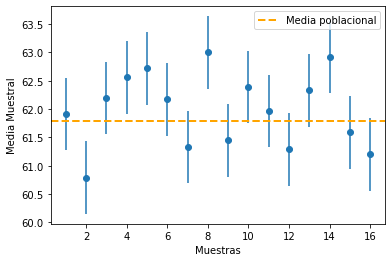

In [15]:
titulo("Media de 16 muestras con 10 observaciones de depth")

mediaDepth = st.mean(depth)
graficarMedias(mediaMuestras10Depth, mediaDepth) 

Media de 16 muestras con 25 observaciones de depth
----------------------------------------------




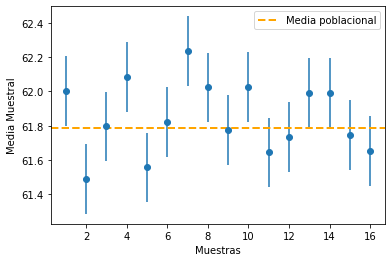

In [16]:
titulo("Media de 16 muestras con 25 observaciones de depth")

graficarMedias(mediaMuestras25Depth, mediaDepth) 

Media de 16 muestras con 10 observaciones de price
----------------------------------------------




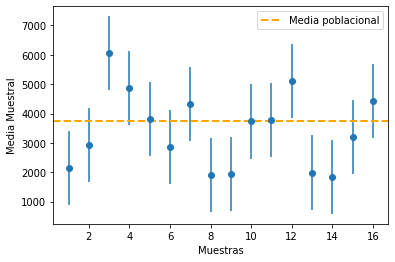

In [17]:
titulo("Media de 16 muestras con 10 observaciones de price")

mediaPrice = st.mean(price)
graficarMedias(mediaMuestras10Price, mediaPrice) 

Media de 16 muestras con 25 observaciones de price
----------------------------------------------




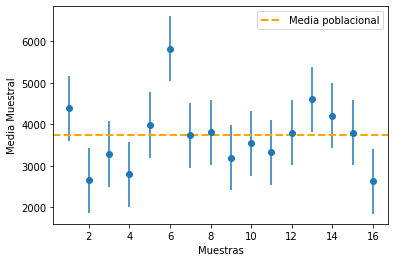

In [18]:
titulo("Media de 16 muestras con 25 observaciones de price")

mediaPrice = st.mean(price)
graficarMedias(mediaMuestras25Price, mediaPrice) 

### 3.3 Graficar un histograma que ilustre la distribución de las medias muestrales de $n=10$ observaciones. Repita lo mismo con $n=25$. ¿Qué diferencia encuentra entre ambos histogramas?(**15 puntos**)

Nótese que los apartados anteriores deben desarrollarse 2 veces. Una vez por cada columna.

Como ha sido costumbre, se espera que los estudiantes entreguen un notebook de colab con tanto nivel de detalle como sea posible. La calificación de cada apartado depende que los estudiantes hayan logrado demostrar con claridad y detalle lo planteado en cada punto.

Los estudiantes deberán realizar la entrega a través de TEC Digital a más tardar el día 24 de febrero a las 11:59 PM.

Media de 16 muestras con 10 observaciones de depth
----------------------------------------------




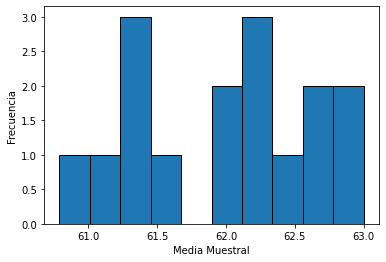

In [19]:
titulo("Media de 16 muestras con 10 observaciones de depth")

histogramaMedias(mediaMuestras10Depth)

Media de 16 muestras con 25 observaciones de depth
----------------------------------------------




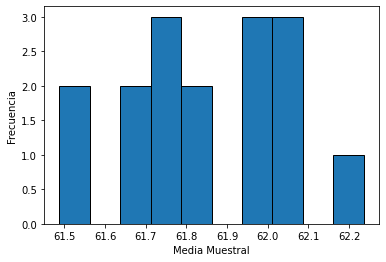

In [20]:
titulo("Media de 16 muestras con 25 observaciones de depth")

histogramaMedias(mediaMuestras25Depth) 

Media de 16 muestras con 10 observaciones de price
----------------------------------------------




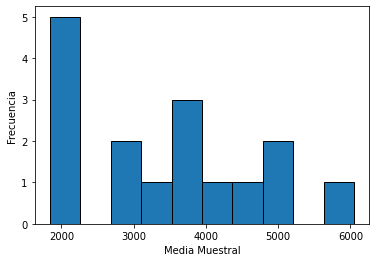

In [21]:
titulo("Media de 16 muestras con 10 observaciones de price")

histogramaMedias(mediaMuestras10Price) 

Media de 16 muestras con 25 observaciones de price
----------------------------------------------




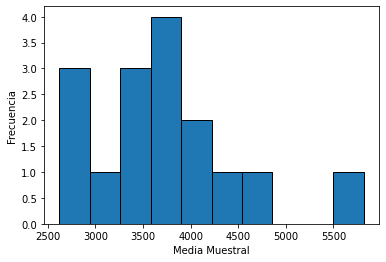

In [22]:
titulo("Media de 16 muestras con 25 observaciones de price")

histogramaMedias(mediaMuestras25Price)

#### Conclusión

Se puede notar en los histogramas que entre mayor número de muestras se empieza a forma la campana de Gauss.  Esto se debe al teorema del límite central, que indica las medias muestrales siguen una distribución normal entre mayor es el tamaño de la muestra (N), sin importar si los datos provienen de otras distribuciones.  Es importante recalcar que depth en la tarea anterior se pudo concluir que proviene de una distribución T-student y normal, y price proviene de una distribución exponencial.